## Testing linear regression's ability to predict precipitation amounts in Albany, NY.
In this notebook, we explore the potential of linear regression to predict precipitation amounts in Albany, NY with at least 50% accuracy. To do this, we explore our data, clean our data, and then go through the training process. Upon completion of the linear regression for predicting precipitation, we explore other more feasible regressions that may produce better results.

Here, we are installing the packages we need as well as our data (The data can be found at the NOAA National Center for Environmental Information or using this link: https://www.kaggle.com/datasets/die9origephit/temperature-data-albany-new-york).

In [1]:
#Installing the required packages
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

#Installing the dataset (This dataset is a CSV file)
weather = pd.read_csv('daily_data.csv')

## Cleaning Data
Here, we are exploring our data, which includes examining the columns in our dataset as well as identifying any potential inputs/variables that may produce errors during training. To clean our dataset, we exclude columns that we will not need in our modeling. We also remove string values (e.g., "T" for trace amounts) and convert them into a numeric value of 0.001.

In [2]:
#Exploring the dataset 
print(weather.head()) # showing the first 5 rows of the dataset
print(weather.describe()) # showing the statistical summary of the dataset

       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T23:59:00       SOD         6         PRECIP   
1  72518014735  2015-01-02T23:59:00       SOD         6         PRECIP   
2  72518014735  2015-01-03T23:59:00       SOD         6         PRECIP   
3  72518014735  2015-01-04T23:59:00       SOD         6         PRECIP   
4  72518014735  2015-01-05T23:59:00       SOD         6         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...                   190.0            

In [3]:
#Cleaning the dataset (Getting rid of columns that are not needed for this analysis)
#Dropping unnecessary columns
weather = weather.drop(columns=['STATION', 'REPORT_TYPE', 'SOURCE', 'BackupEquipment', 'BackupElements', 'BackupName', 'DailySnowfall', 'DailySnowDepth'])

#Changng the date column to datetime format
weather['DATE'] = pd.to_datetime(weather['DATE']).dt.date

#Chnaging the T in DailyPrecipitation to 0.001 
weather['DailyPrecipitation'] = weather['DailyPrecipitation'].replace({'T': 0.001})

## Exploring Trends in Data 
Here, we are creating a graph to show precipitation rates over time. This is the first graph we create, and it serves to show us if there are any trends in our data that would be helpful to note for the model training process. We also create a correlation matrix to examine which features are related to our target variable (daily precipitation), as well as to identify other features that may serve as strong target values should precipitation not work.s

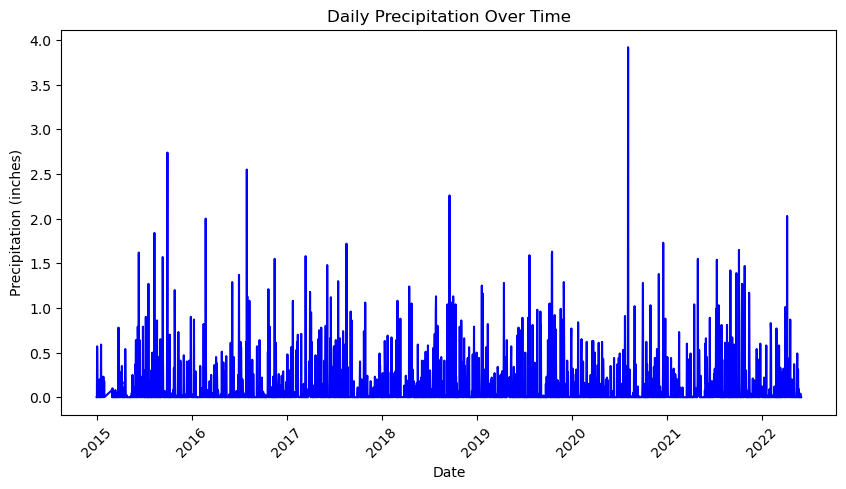

In [4]:
#Making a plot of percpitation over time
weather['DailyPrecipitation'] = pd.to_numeric(weather['DailyPrecipitation'], errors='coerce')

plt.figure(figsize=(10, 5))
plt.plot(weather['DATE'], weather['DailyPrecipitation'], color='blue')
plt.title('Daily Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.show()

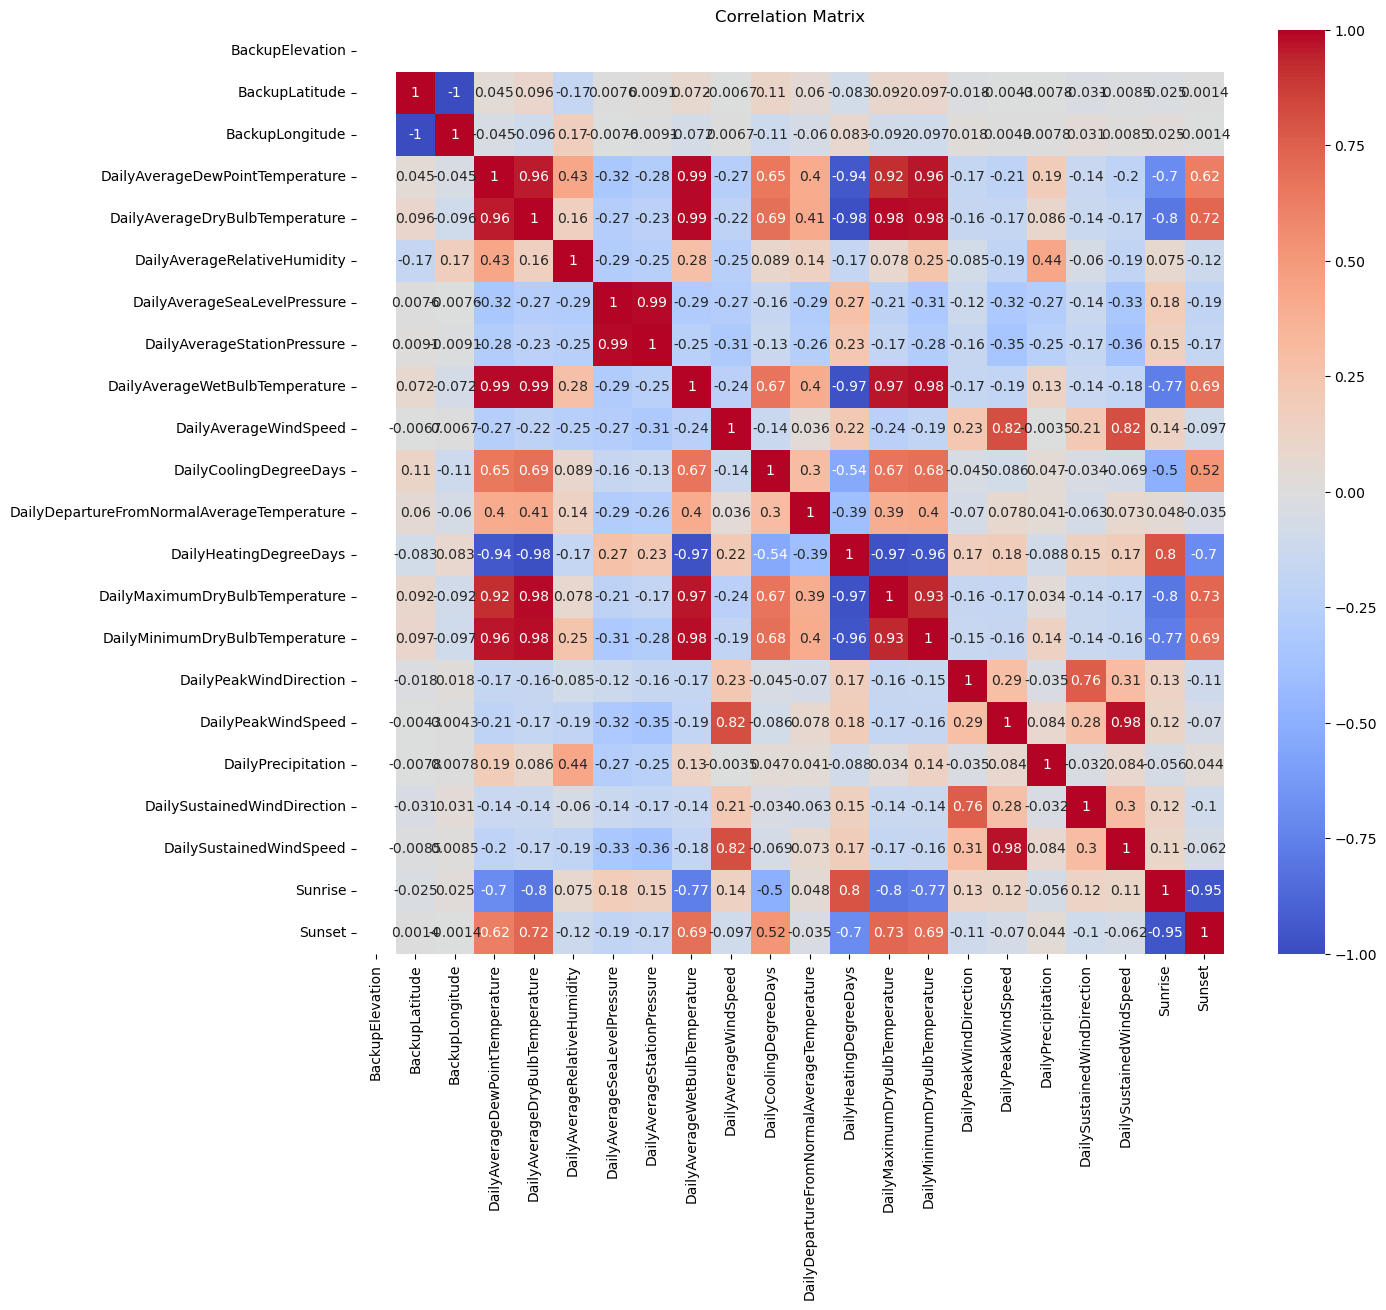

In [5]:
#Creating a simple corelation matrix to see how the features are related to the target variable (using seaborn) dropping date
plt.figure(figsize=(14, 12))
weather_cleaned = weather.drop(columns=['DATE', 'WindEquipmentChangeDate']) 
correlation_matrix = weather_cleaned.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Linear regression (Daily Percipitation)
Here, we are running a linear regression using all of the available features (minus features that include strings as values or that have no strong correlation to our target). We use Elastic Net in order to balance the features used in the learning process. After training our model, we assess its performance by looking at the mean squared error and R-squared. We then create a scatter plot to visualize our model's performance.

In [6]:
#Running a linear regression on the data 
#Splitting the data into features and target variable (target is DailyPercipitation) 
#in our features we will use DailyAverageHumidity, DailyAverageWetBulbTemperature, DailyMinimumDryBulbTemperature
X = weather.drop(columns=['DailyPrecipitation', 'DATE', 'WindEquipmentChangeDate'])
y = weather['DailyPrecipitation']


In [7]:
#Scaling our date 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Create the ElasticNet model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

#Fit the model
model.fit(X_train, y_train)

#Predict on test data
y_pred = model.predict(X_test)

#Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 0.0629489234928585
R2 Score: 0.15489626883432472


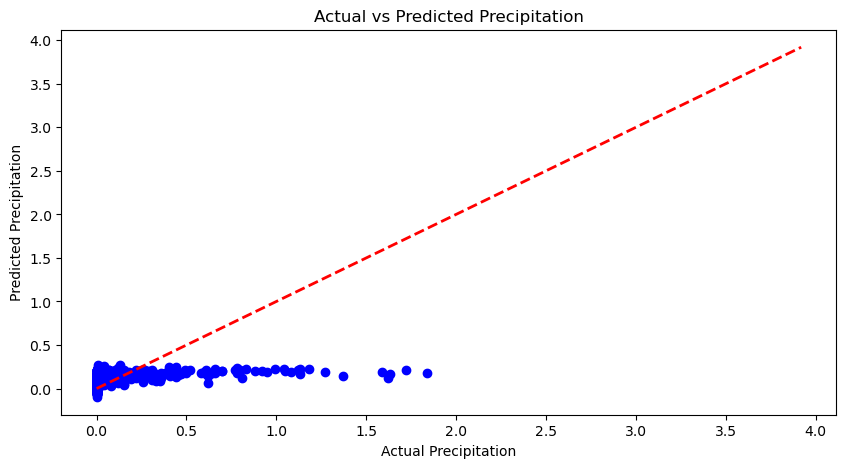

In [9]:
#Creating a scatter plot (y-train vs y-pred)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Precipitation')
plt.xlabel('Actual Precipitation')
plt.ylabel('Predicted Precipitation')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.show()

## Linear Regression (Daily Departure From Normal Average Temperature)
Here, we are running a linear regression using all of the available features (minus features that include strings as values or that have no strong correlation to our target). We use Elastic Net in order to balance the features used in the learning process. After training our model, we assess its performance by looking at the mean squared error and R-squared. We then create a scatter plot to visualize our model's performance. This time, instead of predicting precipitation rate, we are predicting the daily departure from the normal average temperature to explore if linear regression is still feasible for this type of data.

In [10]:
#Running a new linear regression with our target as DailyDepartureFromNormalAverageTemperature
#Splitting the data into features and target variable (target is DailyDepartureFromNormalAverageTemperature)
X2 = weather.drop(columns=['DailyDepartureFromNormalAverageTemperature', 'DATE', 'WindEquipmentChangeDate'])
y2 = weather['DailyDepartureFromNormalAverageTemperature']

#Scaling our data
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

#Splitting the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

#Creating the ElasticNet model
model2 = ElasticNet(alpha=0.1, l1_ratio=0.5)

#Fitting the model
model2.fit(X2_train, y2_train)

#Predicting on test data
y2_pred = model2.predict(X2_test)

#Evaluating the model performance
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
print('Mean Squared Error:', mse2)
print('R2 Score:', r2_2)


Mean Squared Error: 26.532109420501953
R2 Score: 0.557656536320964


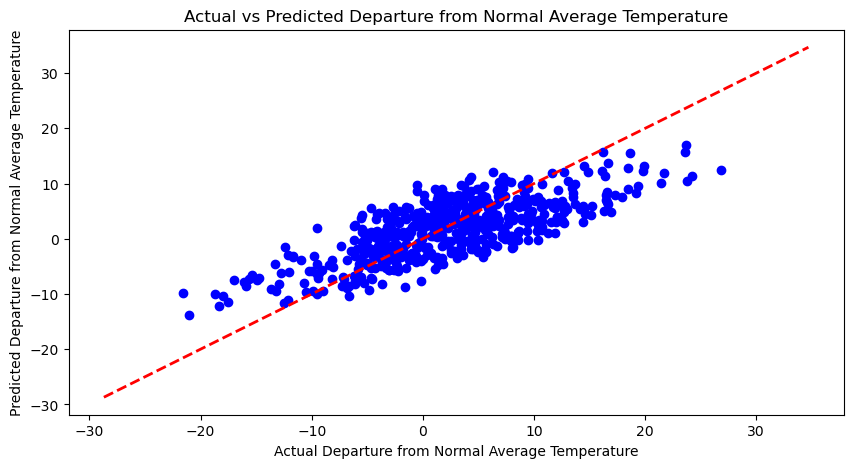

In [11]:
#creating a scatter plot (y-train vs y-pred)
plt.figure(figsize=(10, 5))
plt.scatter(y2_test, y2_pred, color='blue')
plt.title('Actual vs Predicted Departure from Normal Average Temperature')
plt.xlabel('Actual Departure from Normal Average Temperature')
plt.ylabel('Predicted Departure from Normal Average Temperature')
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'r--', lw=2)
plt.show()